# Simple Linear Regression Ordinary Least Squares Methodologies with Python

In [1]:
%reset
import pandas as pd
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
Salt=pd.read_csv('WatershedSalt.csv')
Salt

,Salt_Conc,Roadway_Area
0,3.8,0.19
1,5.9,0.15
2,14.1,0.57
3,10.4,0.40
4,14.6,0.70
5,14.5,0.67
6,15.1,0.63
7,11.9,0.47
8,15.5,0.75
9,9.3,0.60


Text(0.2, 30, 'r=0.98,   p-value=<0.0001')

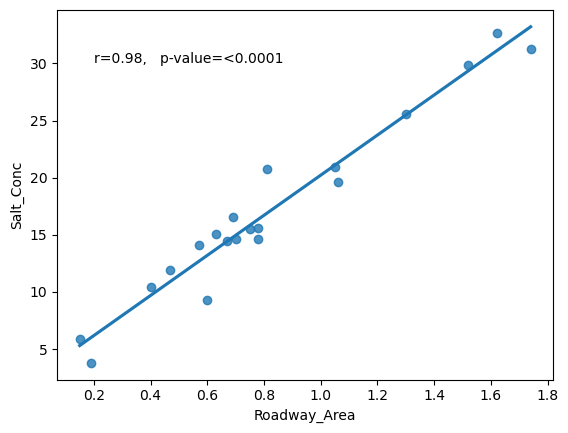

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plotSalt=sns.regplot(x='Roadway_Area',y='Salt_Conc',data=Salt,ci=None)
plotSalt.annotate(text='r=0.98,   p-value=<0.0001',xy=(.2,30),xycoords='data')

In [4]:
from scipy import stats
stats.pearsonr(x=Salt["Salt_Conc"],y=Salt["Roadway_Area"])

PearsonRResult(statistic=0.9754033996529128, pvalue=2.8626350342215104e-13)

In [5]:
Salt.cov()

,Salt_Conc,Roadway_Area
Salt_Conc,62.519237,3.389905
Roadway_Area,3.389905,0.193194


In [6]:
Salt.corr()

,Salt_Conc,Roadway_Area
Salt_Conc,1.000000,0.975403
Roadway_Area,0.975403,1.000000


In [7]:
meanSalt_Conc=(Salt["Salt_Conc"]).mean()
meanRoad_Area=(Salt["Roadway_Area"]).mean()
meanRoad_Area

0.8240000000000001

The sum of the sqaures of x (the sum of the squared deviations from the mean of the data vector x) divided by the vectors dof is equal to the variance of x.  This is on the diagonal of covariance matrix as the variance.

In [8]:
SSx_Road=sum( ( (Salt["Roadway_Area"]-meanRoad_Area) **2) )

In [9]:
SSx_Road

3.6706800000000004

In [10]:
SSx_Road/(19)

0.19319368421052632

The sum of the cross-products of x and y divided by the dof is equal to the covariance of xy.  This is on the off diagonal of the covariance matrix.

In [16]:
SumCrossProducts=(sum ((Salt["Roadway_Area"]-meanRoad_Area) * (Salt["Salt_Conc"]-meanSalt_Conc)))
SumCrossProducts

64.40820000000002

In [17]:
SumCrossProducts/(19)

3.389905263157896

The covariance divided by the variance for simple linear regression is the beta coefficient for x.

In [18]:
3.389905263157896/0.19319368421052632

17.54666710255321

Correlation is the standardized covariance of xy.

In [19]:
(SumCrossProducts/(19))/((np.std(Salt["Roadway_Area"],ddof=1))*(np.std(Salt["Salt_Conc"],ddof=1)))

0.9754033996529132

# Matrix Math Formulation

In [20]:
# Can either mean center the values or use the raw values
X = (Salt["Roadway_Area"]-meanRoad_Area)
#X = (Salt["Roadway_Area"])
#Y = (Salt["Salt_Conc"])
Y = (Salt["Salt_Conc"]-meanSalt_Conc)

In [21]:
X=np.asarray(X)
X

array([-0.634, -0.674, -0.254, -0.424, -0.124, -0.154, -0.194, -0.354,
       -0.074, -0.224, -0.044, -0.014, -0.044, -0.134,  0.476,  0.226,
        0.696,  0.236,  0.916,  0.796])

In [22]:
sum(X)

-2.220446049250313e-16

In [23]:
Y=np.asarray(Y)

In [24]:
X.shape

(20,)

In [25]:
X_bias=np.ones((20,1)) # m is the number of records in the dataset
X_bias

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [26]:
X=np.reshape(X,(20,1))
Y=np.reshape(Y,(20,1))

In [27]:
X

array([[-0.634],
       [-0.674],
       [-0.254],
       [-0.424],
       [-0.124],
       [-0.154],
       [-0.194],
       [-0.354],
       [-0.074],
       [-0.224],
       [-0.044],
       [-0.014],
       [-0.044],
       [-0.134],
       [ 0.476],
       [ 0.226],
       [ 0.696],
       [ 0.236],
       [ 0.916],
       [ 0.796]])

In [28]:
Y

array([[-13.335],
       [-11.235],
       [ -3.035],
       [ -6.735],
       [ -2.535],
       [ -2.635],
       [ -2.035],
       [ -5.235],
       [ -1.635],
       [ -7.835],
       [ -1.535],
       [  3.665],
       [ -2.535],
       [ -0.535],
       [  8.465],
       [  3.765],
       [ 12.765],
       [  2.465],
       [ 14.165],
       [ 15.565]])

In [29]:
newX=np.append(X_bias,X,axis=1)
newX

array([[ 1.   , -0.634],
       [ 1.   , -0.674],
       [ 1.   , -0.254],
       [ 1.   , -0.424],
       [ 1.   , -0.124],
       [ 1.   , -0.154],
       [ 1.   , -0.194],
       [ 1.   , -0.354],
       [ 1.   , -0.074],
       [ 1.   , -0.224],
       [ 1.   , -0.044],
       [ 1.   , -0.014],
       [ 1.   , -0.044],
       [ 1.   , -0.134],
       [ 1.   ,  0.476],
       [ 1.   ,  0.226],
       [ 1.   ,  0.696],
       [ 1.   ,  0.236],
       [ 1.   ,  0.916],
       [ 1.   ,  0.796]])

In [30]:
newX.shape

(20, 2)

In [31]:
Salt_transpose=np.transpose(newX)
Salt_transpose

array([[ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ],
       [-0.634, -0.674, -0.254, -0.424, -0.124, -0.154, -0.194, -0.354,
        -0.074, -0.224, -0.044, -0.014, -0.044, -0.134,  0.476,  0.226,
         0.696,  0.236,  0.916,  0.796]])

In [32]:
Salt_transpose.shape

(2, 20)

In [33]:
XtX=((Salt_transpose.dot(newX)))
XtX

array([[ 2.00000000e+01, -2.22044605e-16],
       [-2.22044605e-16,  3.67068000e+00]])

In [34]:
XtX_Inverse=np.linalg.inv(XtX)
XtX_Inverse

array([[5.00000000e-02, 3.02457045e-18],
       [3.02457045e-18, 2.72429087e-01]])

In [35]:
XtY=((Salt_transpose.dot(Y)))
XtY

array([[6.03961325e-14],
       [6.44082000e+01]])

In [36]:
XtX_Inverse.dot(XtY)

array([[3.21461377e-15],
       [1.75466671e+01]])

In [37]:
CenteredDF=np.append(newX,Y,axis=1)
CenteredDF=pd.DataFrame(CenteredDF,columns=["X1","X","Y"])
CenteredDF

,X1,X,Y
0,1.0,-0.634,-13.335
1,1.0,-0.674,-11.235
2,1.0,-0.254,-3.035
3,1.0,-0.424,-6.735
4,1.0,-0.124,-2.535
5,1.0,-0.154,-2.635
6,1.0,-0.194,-2.035
7,1.0,-0.354,-5.235
8,1.0,-0.074,-1.635
9,1.0,-0.224,-7.835


In [38]:
from statsmodels.formula.api import ols

model2=ols('Y~X',data=CenteredDF)
results2=model2.fit()
print(results2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.949   
Dependent Variable: Y                AIC:                81.9537 
Date:               2023-06-26 16:02 BIC:                83.9451 
No. Observations:   20               Log-Likelihood:     -38.977 
Df Model:           1                F-statistic:        352.5   
Df Residuals:       18               Prob (F-statistic): 2.86e-13
R-squared:          0.951            Scale:              3.2065  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.0000    0.4004   0.0000  1.0000  -0.8412   0.8412
X             17.5467    0.9346  18.7739  0.0000  15.5831  19.5103
-----------------------------------------------------------------
Omnibus:               0.923        Durbin-Watson:          2.153
Prob(Omnibus):        

In [39]:
from statsmodels.stats.anova import anova_lm
anova_results2 = anova_lm(results2)
print(anova_results2)

            df       sum_sq      mean_sq           F        PR(>F)
X          1.0  1130.149244  1130.149244  352.460257  2.862635e-13
Residual  18.0    57.716256     3.206459         NaN           NaN


## Goodness of Fit through matrix formulation

The standard error of the beta coefficient is equal to the square root (of the diagonal of the inverse of the XtX matrix * the square of the standard error of the regression (which is the mean squared error or the scale)):  
sqrt(0.272 * 3.207) = 0.934

The standard error of the regression (=standard error of the estimate =residual standard error) is the model estimate that is analogous to the standard deviation of a sample. It represents the average distance that the observed values fall from the regression line and is a measure of the precsion of the model. Here it is sqrt(3.2065)= 1.7907

The standard error of the regression is equal to the square root of (the sum of the squares of the residual divided by the dof of the residuals) = square root of the MSE.  

To find the standard error of the beta coefficient, we find the sqrt(MSE divided by the sum of squares of the predictor x).  sqrt (3.2065/3.671) = 0.9346

This is the same as the standard error of the regression ( = sqrt(SSE/(n-2)) ) divided by ( (the standard deviation of the x sample multiplied by the sqrt(n-1) ) or ( = sqrt(SSx/(n-1)) * sqrt(n-1) ) ) = 1.7907 / (0.4396 * sqrt(19)) = 1.7907 / 1.9159 = 0.9346

The diagonal of the XtX matrix is the sum of squares of x, which we can divide by dof to get the sample variance of x.  3.671/19 = 0.1932.  Square root of the sample variance is the sample std = 0.4396.

This diagonal of the XtX matrix will provide the sum of squares for the x variables.  Since this is a simple linear regression example, we can divide by this value directly to find the SE(beta).  This is the same as multiplying by (1/3.671)= 0.2724, so sqrt (3.2065 * 0.2724) = 0.9346.  

In multiple linear regression, we will not be able to divide like this (you cant divide by a matrix) but you can multiple by the inverse of a matrix.  This is why we will look to matrix math to help in keeping track of the sum of squares for the x variables and have a matrix that holds teh inverse of these.  

In [54]:
np.var(Salt["Roadway_Area"],ddof=1)

0.19319368421052632

In [55]:
np.std(Salt["Roadway_Area"],ddof=1)

0.43953803499870897

In [56]:
from statsmodels.formula.api import ols

model1=ols('Salt_Conc~Roadway_Area',data=Salt)
results1=model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.949   
Dependent Variable: Salt_Conc        AIC:                81.9537 
Date:               2023-06-26 16:04 BIC:                83.9451 
No. Observations:   20               Log-Likelihood:     -38.977 
Df Model:           1                F-statistic:        352.5   
Df Residuals:       18               Prob (F-statistic): 2.86e-13
R-squared:          0.951            Scale:              3.2065  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      2.6765    0.8680   3.0836  0.0064   0.8529   4.5002
Roadway_Area  17.5467    0.9346  18.7739  0.0000  15.5831  19.5103
-----------------------------------------------------------------
Omnibus:               0.923        Durbin-Watson:          2.153
Prob(Omnibus):        

In [43]:
from statsmodels.stats.anova import anova_lm
anova_results1 = anova_lm(results1)
print(anova_results1)

                df       sum_sq      mean_sq           F        PR(>F)
Roadway_Area   1.0  1130.149244  1130.149244  352.460257  2.862635e-13
Residual      18.0    57.716256     3.206459         NaN           NaN


In [44]:
SSy_Salt=sum( ( (Salt["Salt_Conc"]-meanSalt_Conc) **2) )
SSy_Salt

1187.8655

In [45]:
SSx_Road=sum( ( (Salt["Roadway_Area"]-meanRoad_Area) **2) )
SSx_Road

3.6706800000000004

Model Review of Assumptions

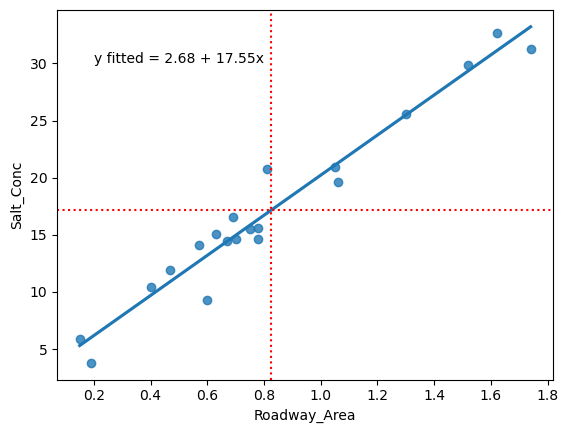

In [46]:
plotSalt=sns.regplot(x='Roadway_Area',y='Salt_Conc',data=Salt,ci=None)
plotSalt.annotate(text='y fitted = 2.68 + 17.55x',xy=(.2,30),xycoords='data')
plotSalt.axvline(x=0.824,c="r",linestyle=":")
plotSalt.axhline(y=17.135,c="r",linestyle=":")

In [47]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(results1)
print(anova_results)

                df       sum_sq      mean_sq           F        PR(>F)
Roadway_Area   1.0  1130.149244  1130.149244  352.460257  2.862635e-13
Residual      18.0    57.716256     3.206459         NaN           NaN


In [48]:
results1.fittedvalues

0      6.010413
1      5.308546
2     12.678147
3      9.695213
4     14.959213
5     14.432813
6     13.730947
7     10.923480
8     15.836547
9     13.204547
10    16.362947
11    16.889347
12    16.362947
13    14.783747
14    25.487214
15    21.100547
16    29.347480
17    21.276013
18    33.207747
19    31.102147
dtype: float64

Text(0, 0.5, 'residuals')

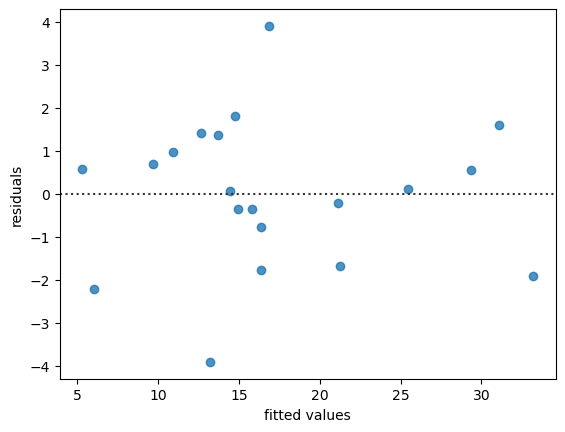

In [49]:
sns.residplot(x=results1.fittedvalues,y=results1.resid)
plt.xlabel("fitted values")
plt.ylabel("residuals")

eval_env: 1


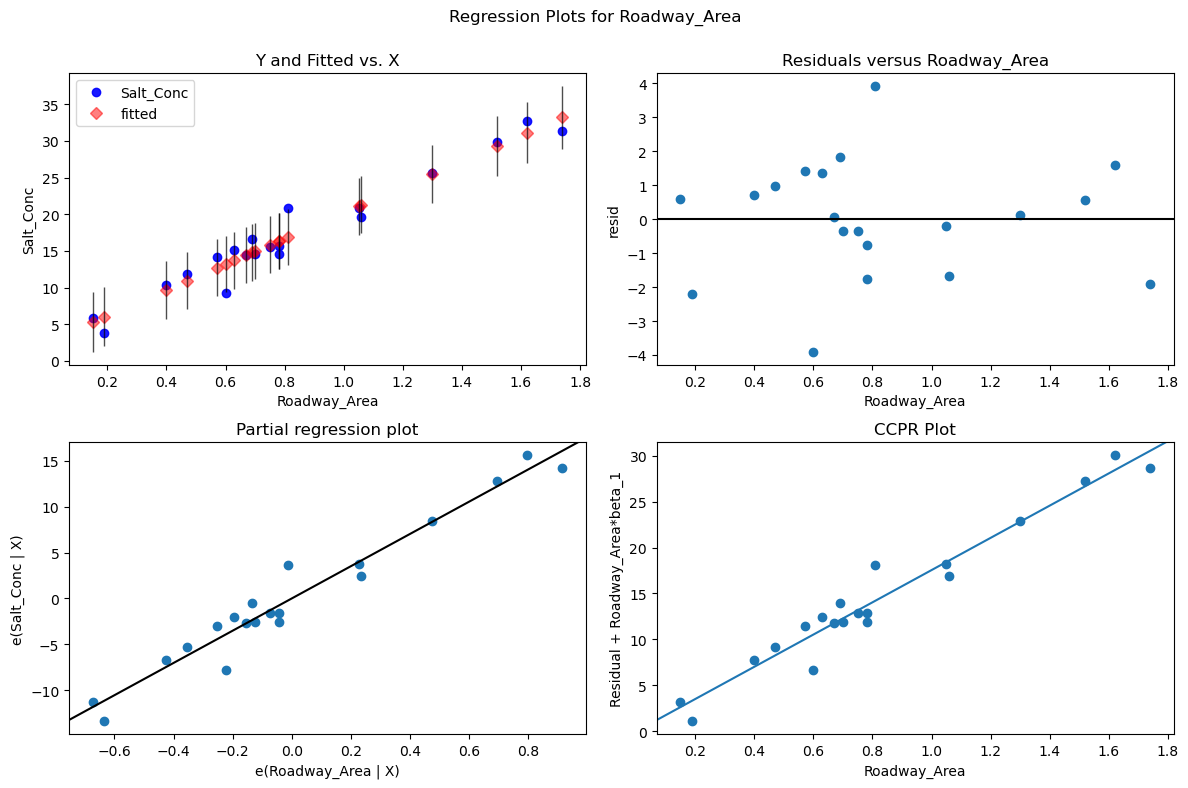

In [50]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results1,'Roadway_Area',fig=fig)

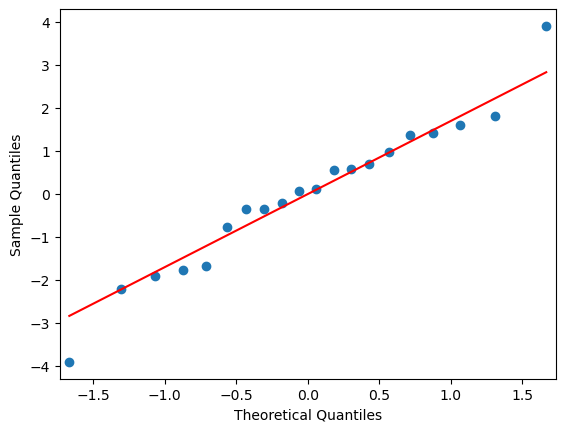

In [51]:
sm.qqplot(results1.resid,line='s')
plt.show()

In [52]:
stats.shapiro(results1.resid)

ShapiroResult(statistic=0.9764649271965027, pvalue=0.8808090090751648)

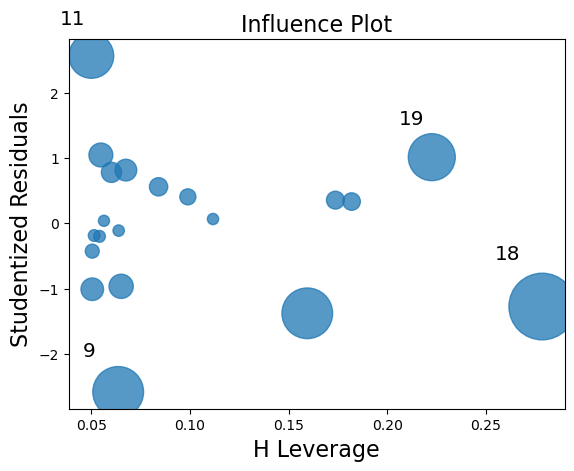

In [53]:
fig=sm.graphics.influence_plot(results1,criterion='cooks')